In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from skimage import io
import os
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage import io
datagen = ImageDataGenerator(
        #rotation_range=5,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #shear_range=0.2,
        zoom_range=0.3,
        fill_mode='constant',
        cval=0.0
    )

img = io.imread('project_data/images/train/corona/0728.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
#for batch in datagen.flow(x, batch_size=1,
  #                        save_to_dir='/', save_prefix='cat', save_format='jpeg'):
 #   i += 1
   # if i > 3:
    #    break  # otherwise the generator would loop indefinitely

Using TensorFlow backend.


In [2]:
file_label = open("project_data/labels/train_labels.txt", "r")
val_labels = open("project_data/labels/val_labels.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]
y_train = [nome[1] for nome in bho]

dio = [(line.strip()).split() for line in val_labels]
numeri_val = [numero[0] for numero in dio]
y_val = [nome[1] for nome in dio]

#X_train è unsorted
#X_train contiene tutte le immagini ma non sono sortate per nome
import glob
X_train = []
X_val = []
X_train_corona = []
X_train_viral = []
X_train_normal = []
X_train_bact = []
nome_cartella = ["bacteria", "corona", "normal", "viral"]

for numero in numeri_test:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/train/{}/{}.jpeg".format(cartella, numero)):
            if cartella == "corona":
                n = io.imread(img)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_corona.append(n)
            elif cartella == "viral":
                n = io.imread(img)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_viral.append(n)
            elif cartella == "normal":
                n = io.imread(img)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_normal.append(n)
            elif cartella == "bacteria":
                n = io.imread(img)
                #n = np.reshape(n,65536)
                n = n.tolist()
                X_train_bact.append(n)
for numero in numeri_val:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/val/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray=True)
            #n = np.reshape(n,65536)
            n = n.tolist()
            X_val.append(n) 
#print(len(X_train[0]))
#plt.imshow(X_train[0])
print(len(X_train_corona))

45


In [3]:
nome_cartella_aug = ["bacterial", "corona", "normale", "viral"]
file_label = open("augmented/train_labels1.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]

for cartella in nome_cartella_aug:
    for numero in numeri_test:
        for img in glob.glob("augmented/{}/{}.jpeg".format(cartella, numero)):
            os.remove(img)
os.remove("augmented/train_labels.txt")

In [4]:
for img in X_train_corona:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/corona', save_prefix='bho', save_format='jpeg'):
        i += 1
        if i > 30:
            break  # otherwise the generator would loop indefinitely
for img in X_train_normal:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/normale', save_prefix='bho', save_format='jpeg'):
        i += 1
        if i > 3:
            break  # otherwise the generator would loop indefinitely
for img in X_train_bact:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/bacterial', save_prefix='bho', save_format='jpeg'):
        i += 1
        if i > 2:
            break  # otherwise the generator would loop indefinitely
for img in X_train_viral:
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
        save_to_dir='augmented/viral', save_prefix='bho', save_format='jpeg'):
        i += 1
        if i > 3:
            break  # otherwise the generator would loop indefinitely
import os
path = 'augmented/corona'
files = os.listdir(path)
corona_index = 0
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str('{:05d}'.format(index)), '.jpeg'])))
    corona_index = index
    
path = 'augmented/normale'
files = os.listdir(path)
normale_index = 0
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str('{:05d}'.format(index+(corona_index+1))), '.jpeg'])))
    normale_index = index + corona_index

path = 'augmented/bacterial'
files = os.listdir(path)
bact_index = 0
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str('{:05d}'.format(index+normale_index+2)), '.jpeg'])))
    bact_index = index + normale_index

path = 'augmented/viral'
files = os.listdir(path)
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str('{:05d}'.format(index+bact_index+3)), '.jpeg'])))

In [5]:
# faccio il label file per il train test
with open('augmented/train_labels.txt', 'w') as f:
    path = 'augmented/corona'
    files = os.listdir(path)
    for index, file in enumerate(files):
        f.write("{:05d} COVID-19\n".format(index))
    path = 'augmented/normale'
    files = os.listdir(path)
    for index, file in enumerate(files):
        f.write("{:05d} normal\n".format(index+corona_index+1))
    path = 'augmented/bacterial'
    files = os.listdir(path)
    for index, file in enumerate(files):
        f.write("{:05d} bacteria\n".format(index+normale_index+2))
    path = 'augmented/viral'
    files = os.listdir(path)
    for index, file in enumerate(files):
        f.write("{:05d} viral\n".format(index+bact_index+3))

In [6]:
file_label = open("augmented/train_labels.txt", "r")
val_labels = open("project_data/labels/val_labels.txt", "r")
bho = [(line.strip()).split() for line in file_label]
numeri_test = [numero[0] for numero in bho]
y_train = [nome[1] for nome in bho]

dio = [(line.strip()).split() for line in val_labels]
numeri_val = [numero[0] for numero in dio]
y_val = [nome[1] for nome in dio]

import glob
X_train = []
X_val = []
nome_cartella_aug = ["bacterial", "corona", "normale", "viral"]
nome_cartella = ["bacteria", "corona", "normal", "viral"]

for numero in numeri_test:
    for cartella in nome_cartella_aug:
        for img in glob.glob("augmented/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray = True)
            #n = np.reshape(n,65536)
            #n = n.tolist()
            X_train.append(n) 
for numero in numeri_val:
    for cartella in nome_cartella:
        for img in glob.glob("project_data/images/val/{}/{}.jpeg".format(cartella, numero)):
            n = io.imread(img, as_gray = True)
            #n = np.reshape(n,65536)
            #n = n.tolist()
            X_val.append(n) 

23600
(256, 256)


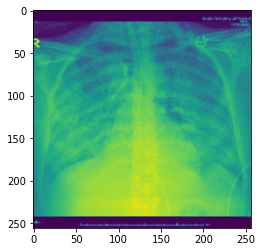

In [7]:
plt.imshow(X_train[2])
print(len(X_train))
print(X_train[0].shape)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [9]:

model = Sequential()
#add model layers



model.add(Conv2D(55, kernel_size=11, activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(27, 27), strides=(2, 2)))
model.add(Conv2D(27, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size=(13, 13), strides=(2, 2)))
model.add(Conv2D(13, kernel_size=3, activation='relu'))
model.add(Conv2D(13, kernel_size=3, activation='relu'))
model.add(Conv2D(13, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4693, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 246, 246, 55)      6710      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 55)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 27)      37152     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 27)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 13)        3172      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 13)        1534      
______________________________________

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()



In [ ]:
model.fit(np.array(X_train), np.array(y_train),
          batch_size=128,
          epochs=10,
          #verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])